<a href="https://colab.research.google.com/github/Sachikethan/Sachikethan_INFO5731_Fall2024/blob/main/Guntha_Sachi_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install --force-reinstall numpy
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp3

LDA Topics:
Topic 0: 55 argument game don true fallacy ve people energy example
Topic 1: just think know don government car administration new like does
Topic 2: file edu use windows files server mail ftp thanks software
Topic 3: people turkish like armenians government armenian just said think children
Topic 4: ax max b8f a86 145 bhj pl 0d 1t bh
Topic 5: said law just door sy know don crime people went
Topic 6: file gun control firearms law cancer congress use states weapons
Topic 7: space edu data graphics use available nasa mail send information
Topic 8: drive disk hard card drives controller bios scsi like new
Topic 9: god people don just like think jesus know does believe

LSA Topics:
Topic 0: ax max a86 b8f pl 1t bhj qq 145 giz
Topic 1: file edu gun pub graphics ftp use control congress mail
Topic 2: file gun congress firearms control mr states rkba united house
Topic 3: 145 b8f 0d bhj bh ah g9v air 55 ao
Topic 4: disk drives hard bios drive rom controller feature card supports
T

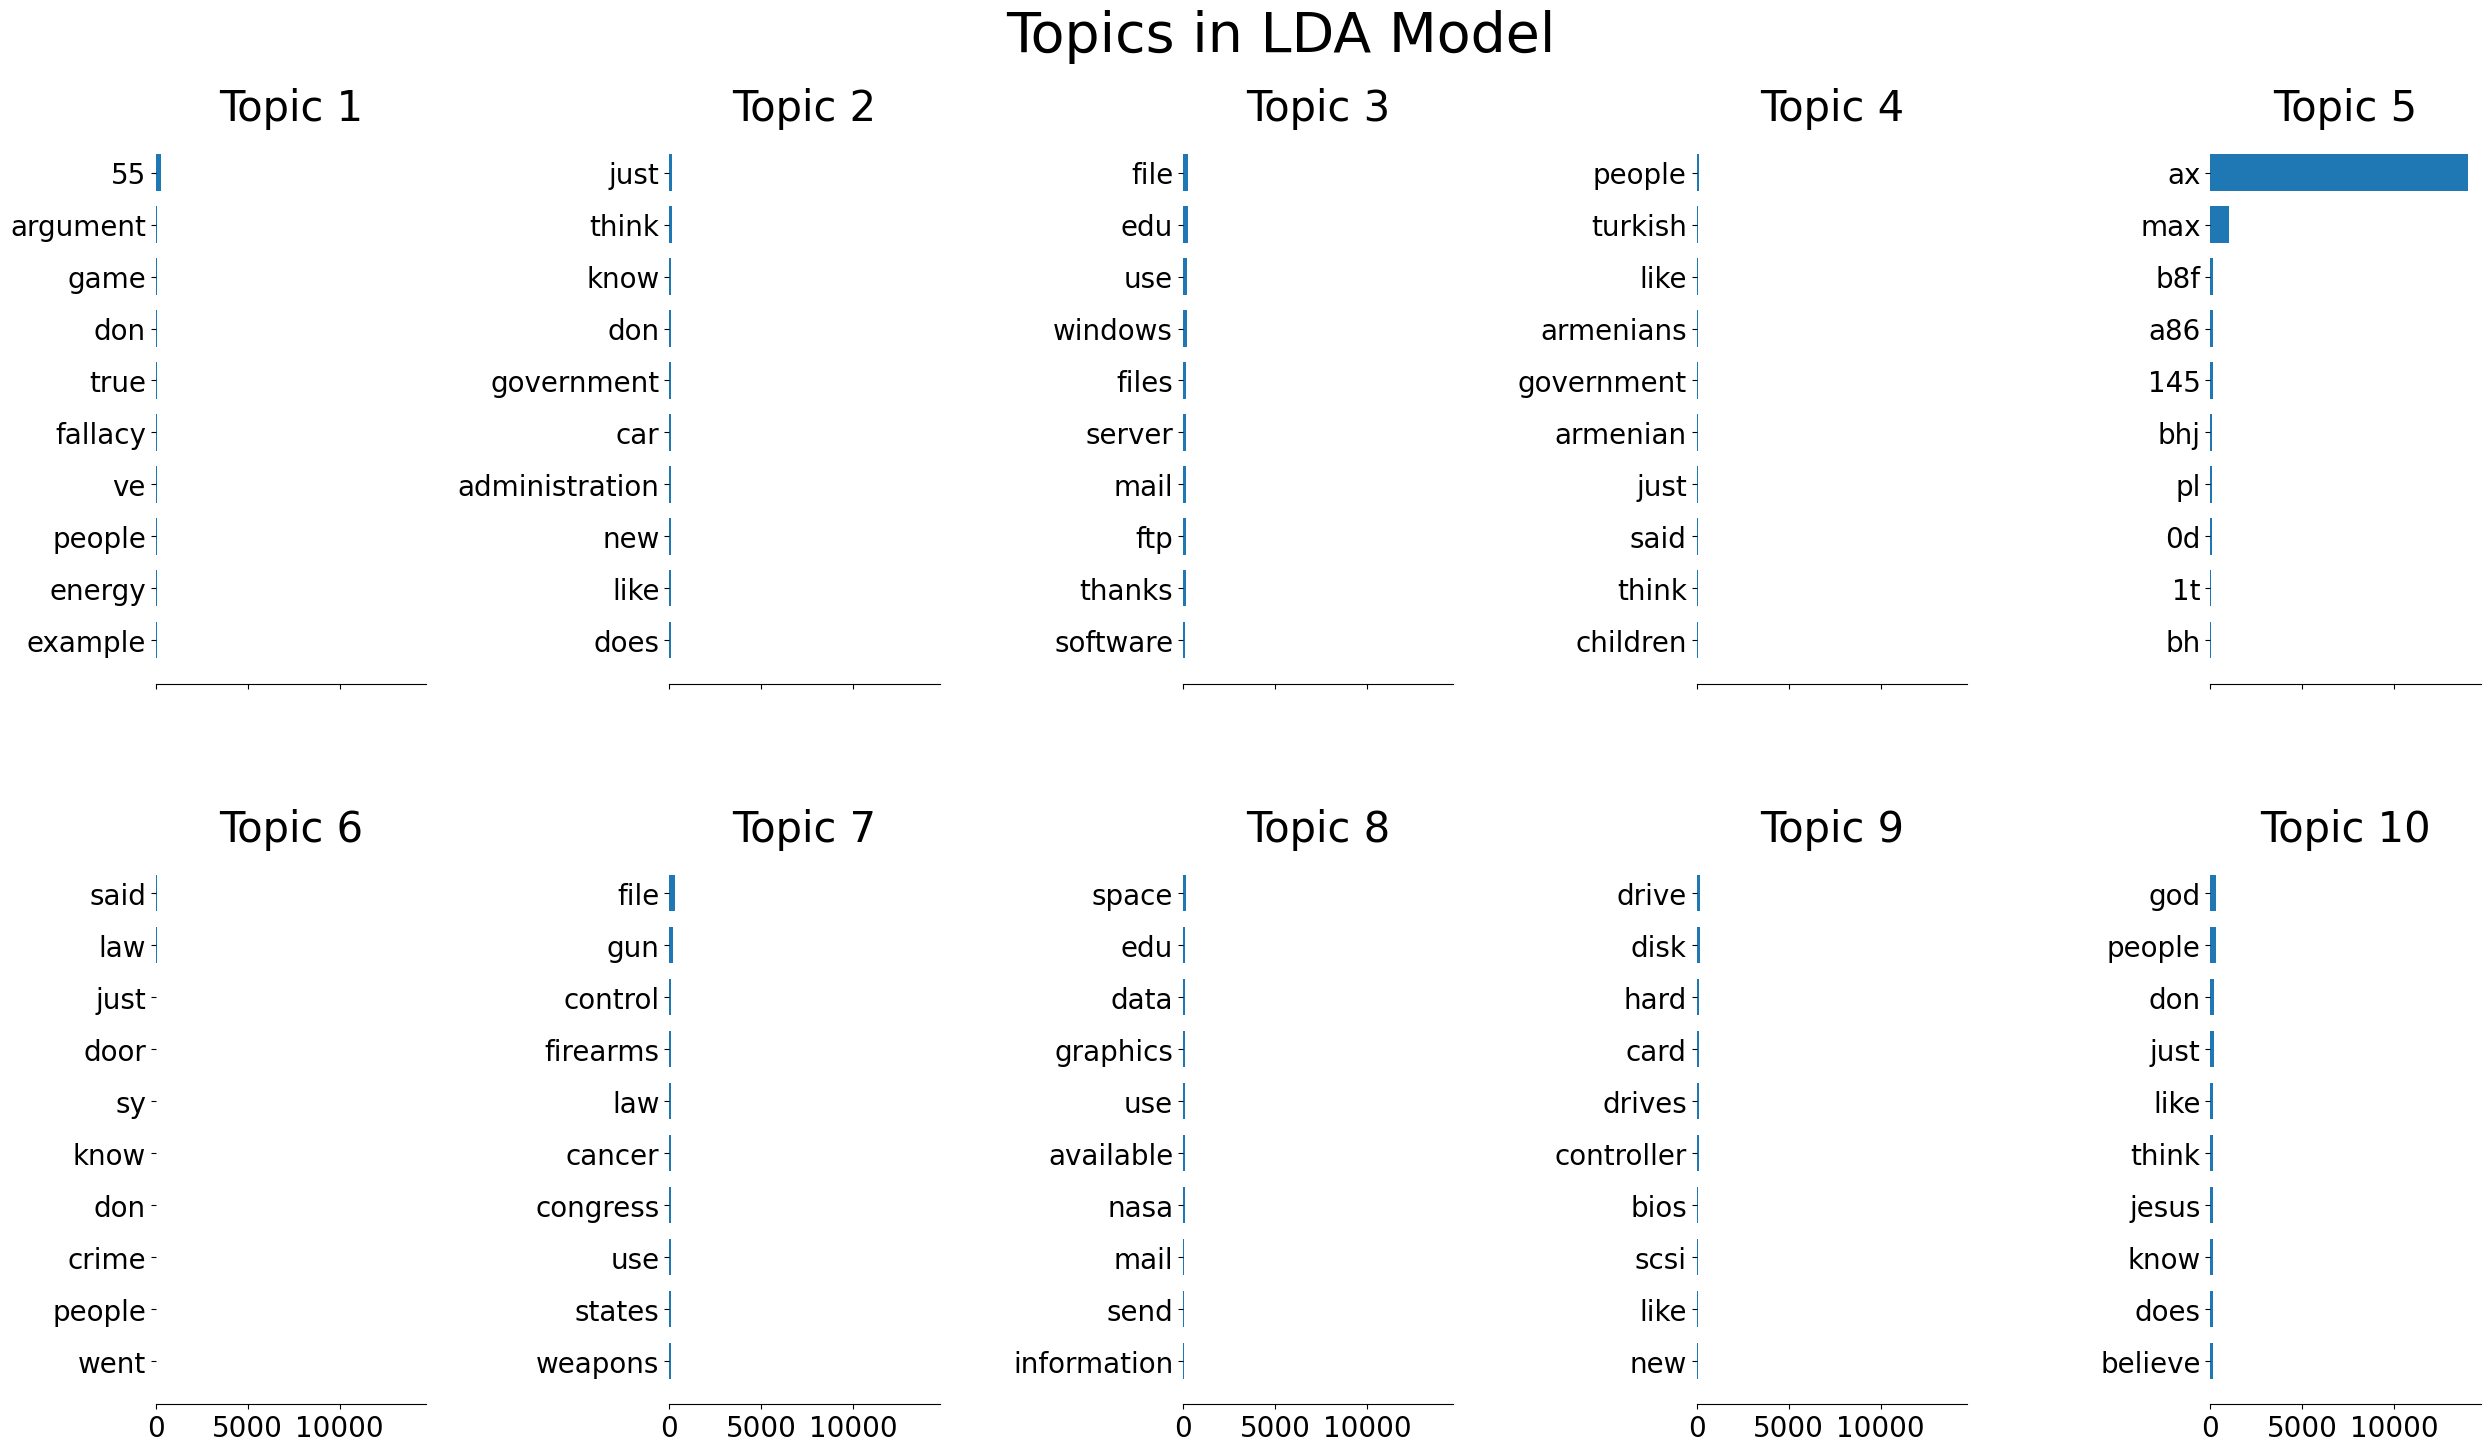

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import gensim
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Fetch data
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# random subset of 2000 documents
np.random.seed(42)
random_indices = np.random.choice(len(newsgroups_data.data), 2000, replace=False)
data_samples = [newsgroups_data.data[idx] for idx in random_indices]

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data_samples)

# LDA Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_dtm = lda_model.fit_transform(dtm)

# LSA Model
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_dtm = lsa_model.fit_transform(dtm)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx), " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("LDA Topics:")
display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

print("\nLSA Topics:")
display_topics(lsa_model, vectorizer.get_feature_names_out(), 10)

# Coherence calculation for LDA
tokenized_docs = [doc.split() for doc in data_samples]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
gensim_lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)
coherence_model_lda = CoherenceModel(model=gensim_lda, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
print("\nLDA Coherence Score:", coherence_model_lda.get_coherence())

# Visualization of LDA topics
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda_model, vectorizer.get_feature_names_out(), 10, 'Topics in LDA Model')


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install bertopic
!pip install umap-learn
!pip install hdbscan
!pip install gensim




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.3.2 gensim==4.3.3
!pip install bertopic umap-learn hdbscan --upgrade

import os
os.kill(os.getpid(), 9)

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import pandas as pd
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Load dataset
df = pd.read_csv("/content/semantic_scholar_abstracts_cleaned (2).csv")
df = df.dropna(subset=["clean_abstract"]).drop_duplicates(subset=["clean_abstract"])
documents = df["clean_abstract"].tolist()

# BERTopic model
topic_model = BERTopic(language="english", verbose=True)
topics, probs = topic_model.fit_transform(documents)

# top 10 topics
topic_model.get_topic_info().head(10)

2025-04-07 23:39:25,275 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/193 [00:00<?, ?it/s]

2025-04-07 23:50:02,546 - BERTopic - Embedding - Completed ✓
2025-04-07 23:50:02,548 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 23:50:43,205 - BERTopic - Dimensionality - Completed ✓
2025-04-07 23:50:43,206 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 23:50:43,467 - BERTopic - Cluster - Completed ✓
2025-04-07 23:50:43,474 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 23:50:44,563 - BERTopic - Representation - Completed ✓


Topic  Count                                    Name  \
0     -1   1974          -1_learning_data_model_machine   
1      0    256  0_student_education_teacher_technology   
2      1    183              1_kernel_vector_svm_matrix   
3      2    128   2_attack_detection_intrusion_security   
4      3    114            3_stock_market_trading_price   
5      4    111         4_image_recognition_object_face   
6      5    109      5_financial_bank_credit_bankruptcy   
7      6    103            6_mining_data_attribute_rule   
8      7     82    7_firm_innovation_research_corporate   
9      8     81     8_diabetes_risk_hypertension_health   

                                      Representation  \
0  [learning, data, model, machine, method, syste...   
1  [student, education, teacher, technology, scho...   
2  [kernel, vector, svm, matrix, problem, support...   
3  [attack, detection, intrusion, security, anoma...   
4  [stock, market, trading, price, return, foreca...   
5  [image, recognition, object, face, feature, se...   
6  [financial, bank, credit, bankruptcy, loan, ri...   
7  [mining, data, attribute, rule, algorithm, set...   
8  [firm, innovation, research, corporate, patent...   
9  [diabetes, risk, hypertension, health, dietary...   

                                 Representative_Docs  
0  [data mining medicine using prototype adaptati...  
1  [flexibility blended learning implementation m...  
2  [kernel learning play important role many mach...  
3  [number cyber attack increased detecting intru...  
4  [forecasting stock market considered one decis...  
5  [invited talk spectral method viewbased object...  
6  [logistic regression industry standard credit ...  
7  [data mining knowledge discovery aim finding u...  
8  [literature buyersupplier relationship commonp...  
9  [objective diabetes one common noncommunicable...

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = ENGLISH_STOP_WORDS.union({
    "method", "methods", "paper", "approach", "based", "result", "results",
    "propose", "use", "present", "using", "show", "demonstrate", "provide"
})

documents_cleaned = []
for doc in documents:
    words = [word for word in doc.split() if word not in custom_stopwords]
    if len(words) > 10:
        documents_cleaned.append(" ".join(words))

from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-mpnet-base-v2")

from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=25, min_samples=5, metric='euclidean')

from bertopic import BERTopic
topic_model = BERTopic(embedding_model=embedding_model, hdbscan_model=hdbscan_model, verbose=True)
topics, probs = topic_model.fit_transform(documents_cleaned)

from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

topic_words = [[word for word, _ in topic] for topic in topic_model.get_topics().values() if topic]
texts_cleaned = [doc.split() for doc in documents_cleaned]
dictionary = Dictionary(texts_cleaned)
corpus = [dictionary.doc2bow(text) for text in texts_cleaned]

coherence_model = CoherenceModel(topics=topic_words, texts=texts_cleaned, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f" Final Optimized Coherence Score: {coherence_score:.4f}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-04-07 23:50:53,887 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/192 [00:00<?, ?it/s]

2025-04-08 01:20:36,274 - BERTopic - Embedding - Completed ✓
2025-04-08 01:20:36,278 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 01:20:47,857 - BERTopic - Dimensionality - Completed ✓
2025-04-08 01:20:47,859 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 01:20:48,066 - BERTopic - Cluster - Completed ✓
2025-04-08 01:20:48,077 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 01:20:49,389 - BERTopic - Representation - Completed ✓


 Final Optimized Coherence Score: 0.6000


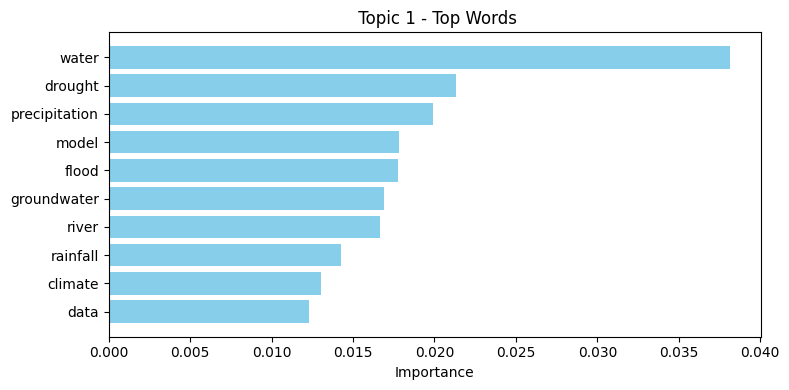

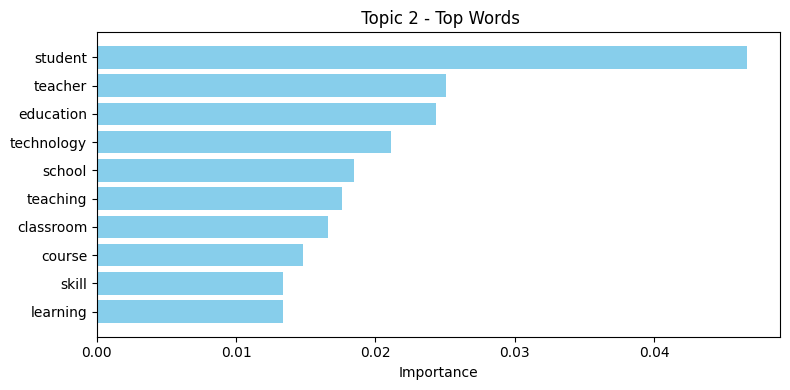

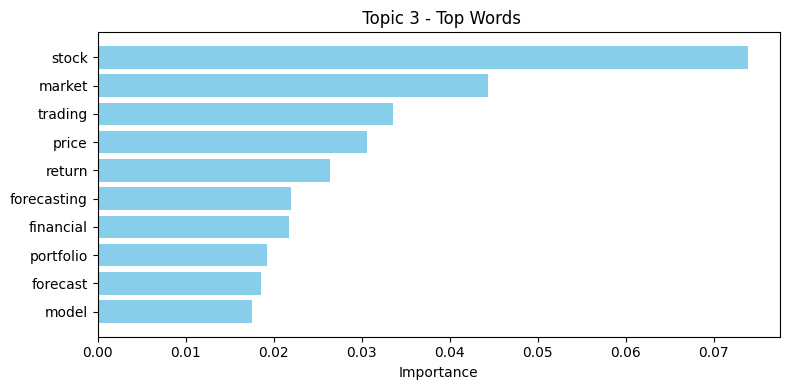

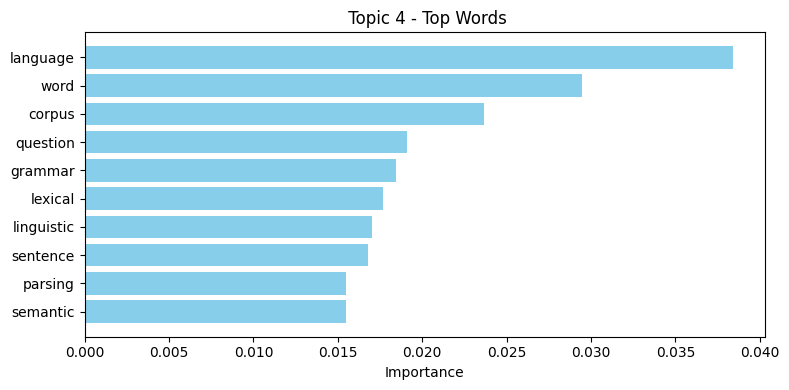

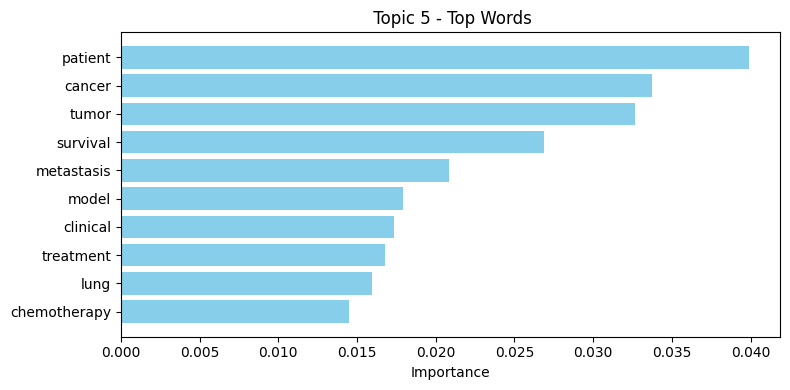

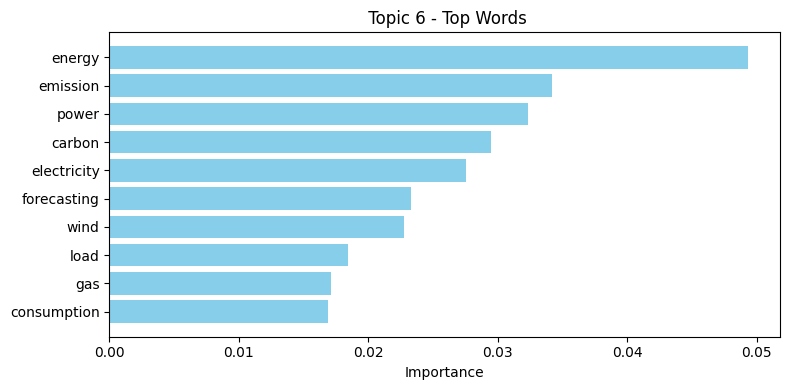

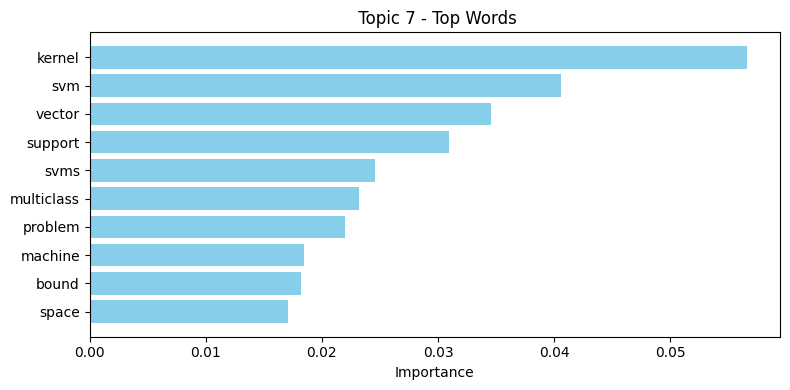

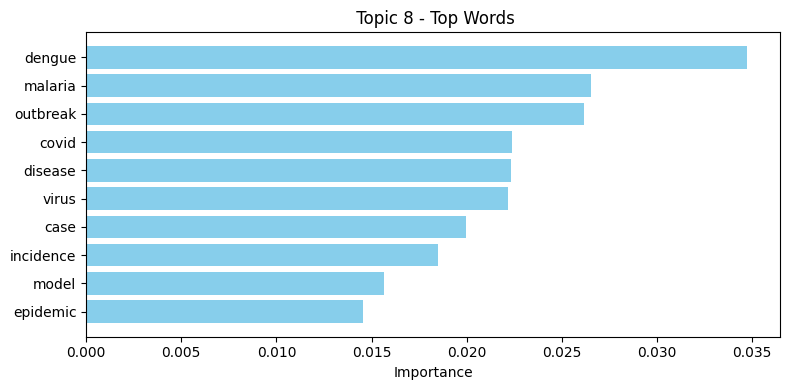

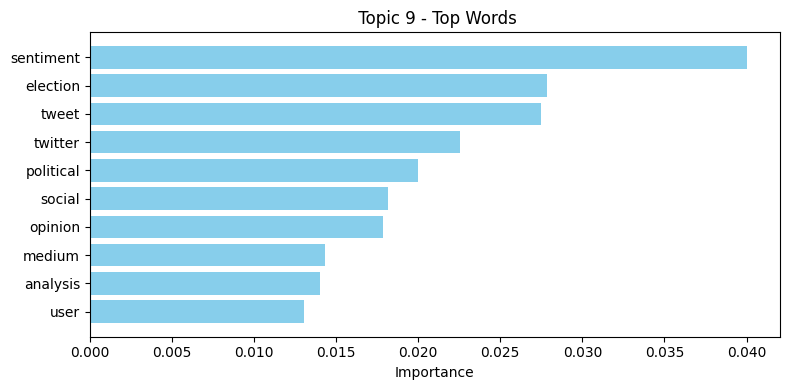

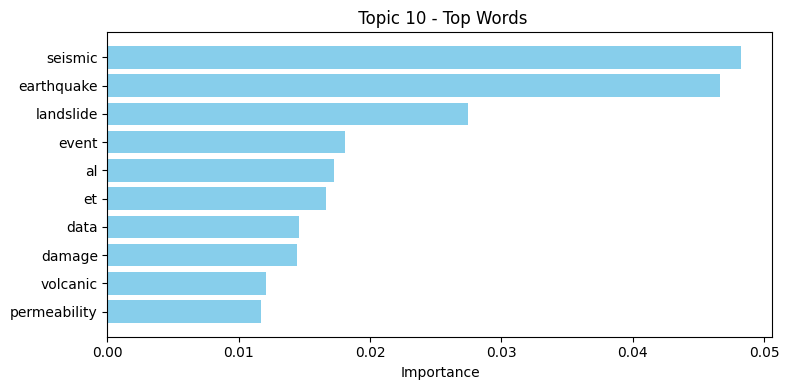

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    topic_words = topic_model.get_topic(i)
    if topic_words:
        words, weights = zip(*topic_words[:10])
        plt.figure(figsize=(8, 4))
        plt.barh(words[::-1], weights[::-1], color='skyblue')
        plt.title(f" Topic {i+1} - Top Words")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

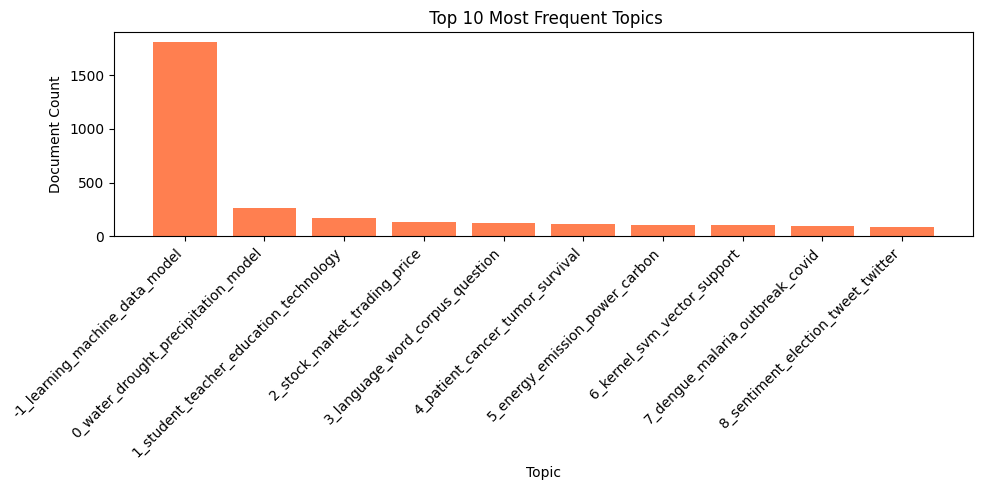

In [ ]:
topic_freq = topic_model.get_topic_info().sort_values("Count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(topic_freq["Name"], topic_freq["Count"], color='coral')
plt.title(" Top 10 Most Frequent Topics")
plt.xlabel("Topic")
plt.ylabel("Document Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=10)

for i, topic_num in enumerate(range(5), start=1):
    print(f"\n Topic {i}:")
    for word, weight in topic_model.get_topic(topic_num):
        print(f"{word} ({weight:.3f})")



 Topic 1:
water (0.038)
drought (0.021)
precipitation (0.020)
model (0.018)
flood (0.018)
groundwater (0.017)
river (0.017)
rainfall (0.014)
climate (0.013)
data (0.012)

 Topic 2:
student (0.047)
teacher (0.025)
education (0.024)
technology (0.021)
school (0.018)
teaching (0.018)
classroom (0.017)
course (0.015)
skill (0.013)
learning (0.013)

 Topic 3:
stock (0.074)
market (0.044)
trading (0.034)
price (0.031)
return (0.026)
forecasting (0.022)
financial (0.022)
portfolio (0.019)
forecast (0.019)
model (0.018)

 Topic 4:
language (0.038)
word (0.029)
corpus (0.024)
question (0.019)
grammar (0.018)
lexical (0.018)
linguistic (0.017)
sentence (0.017)
parsing (0.015)
semantic (0.015)

 Topic 5:
patient (0.040)
cancer (0.034)
tumor (0.033)
survival (0.027)
metastasis (0.021)
model (0.018)
clinical (0.017)
treatment (0.017)
lung (0.016)
chemotherapy (0.014)


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
# Install libraries
!pip install bertopic sentence-transformers umap-learn hdbscan transformers --quiet

In [ ]:
!pip uninstall -y bertopic
!pip install git+https://github.com/MaartenGr/BERTopic.git@master


Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
  Cloning https://github.com/MaartenGr/BERTopic.git (to revision master) to /tmp/pip-req-build-p_bvlf6x
  Running command git clone --filter=blob:none --quiet https://github.com/MaartenGr/BERTopic.git /tmp/pip-req-build-p_bvlf6x
  Resolved https://github.com/MaartenGr/BERTopic.git to commit de250e90598deee57d4ec370ea1ea36a6bde85dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bertopic: filename=bertopic-0.17.0-py3-none-any.whl size=151407 sha256=8bfe3421433d8bb8032ce191255f32f00f34a4563eb2f45e5d0f7e9e94954220
  Stored in directory: /tmp/pip-ephem-wheel-cache-40h92sxf/wheels/27/8a/d0/34b8fd4632acdf7621b99b664112b2120d07566a09015ec9d4
Successfully built bertopic


In [ ]:
# Imports
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from bertopic.representation import TextGeneration
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load 20 Newsgroups dataset
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = dataset.data[:2000]

def truncate(doc, max_words=500):
    return ' '.join(doc.split()[:max_words])

docs_truncated = [truncate(doc) for doc in docs]

In [ ]:
# Load text generation model for GPT-like summarization
generator = pipeline("text2text-generation", model="google/flan-t5-base")
representation_model = TextGeneration(generator)

Device set to use cpu


In [ ]:
# Sentence embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# BERTopic with custom representation model
topic_model = BERTopic(
    embedding_model=embedding_model,
    representation_model=representation_model,
    verbose=True
)

topics, probs = topic_model.fit_transform(docs_truncated)

2025-04-08 03:24:31,918 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-08 03:27:37,858 - BERTopic - Embedding - Completed ✓
2025-04-08 03:27:37,860 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:27:45,060 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:27:45,062 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:27:45,150 - BERTopic - Cluster - Completed ✓
2025-04-08 03:27:45,155 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 4/4 [00:05<00:00,  1.31s/it]
2025-04-08 03:27:50,699 - BERTopic - Representation - Completed ✓


In [ ]:
# Display summaries for a few topics
print("GPT-like Topic Summaries:")
for topic_num, topic_info in list(topic_model.get_topics().items())[:5]:
    print(f"Topic {topic_num}: {topic_info[0]}")

GPT-like Topic Summaries:
Topic 0: ('a tv show', 1)
Topic 1: ('he', 1)
Topic 2: ('hello , hello , hello , hello , hello , hello , hello ', 1)
Topic 3: ('deletion of a symlink', 1)


In [ ]:
!pip install --force-reinstall numpy
!pip install --force-reinstall gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

def calculate_coherence_scores(docs, k_range):
    scores = []
    for k in k_range:
        model = BERTopic(embedding_model=embedding_model, nr_topics=k, verbose=False)
        topic_ids, _ = model.fit_transform(docs_truncated)

        # Get topic words from BERTopic
        topic_words = [
            [word for word, _ in model.get_topic(topic)]
            for topic in set(topic_ids) if topic != -1
        ]

        # Prepare tokenized docs
        tokenized = [doc.split() for doc in docs]
        dictionary = Dictionary(tokenized)

        # Create Gensim CoherenceModel
        cm = CoherenceModel(
            topics=topic_words,
            texts=tokenized,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = cm.get_coherence()
        scores.append((k, score))
        print(f"K={k} → Coherence Score: {score:.4f}")
    return scores

k_range = list(range(5, 26, 5))
coherence_scores = calculate_coherence_scores(docs_truncated, k_range)


K=5 → Coherence Score: 0.6543
K=10 → Coherence Score: 0.6543
K=15 → Coherence Score: 0.6543
K=20 → Coherence Score: 0.6543
K=25 → Coherence Score: 0.6543


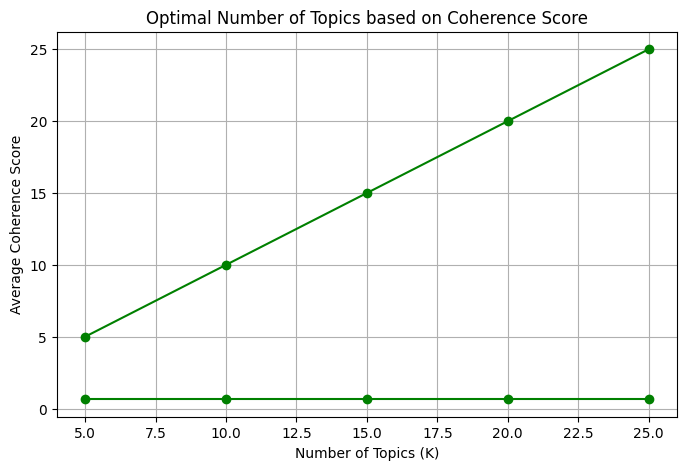

In [ ]:
# Plot coherence vs K
plt.figure(figsize=(8,5))
plt.plot(k_range, coherence_scores, marker='o', color='green')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Average Coherence Score")
plt.title("Optimal Number of Topics based on Coherence Score")
plt.grid(True)
plt.show()

In [ ]:
print(coherence_scores)


[(5, 0.6543245069816286), (10, 0.6543245069816286), (15, 0.6543245069816287), (20, 0.6543245069816286), (25, 0.6543245069816286)]


In [ ]:
k_vals, scores = zip(*coherence_scores)

# Get the best K based on max score
best_k = k_vals[scores.index(max(scores))]
print(f"Optimal Number of Topics: {best_k}")

# Retrain final model using best K
final_model = BERTopic(
    embedding_model=embedding_model,
    representation_model=representation_model,
    nr_topics=best_k,
    verbose=True
)
final_topics, final_probs = final_model.fit_transform(docs)


2025-04-08 03:45:13,944 - BERTopic - Embedding - Transforming documents to embeddings.


Optimal Number of Topics: 15


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-08 03:48:41,852 - BERTopic - Embedding - Completed ✓
2025-04-08 03:48:41,855 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:48:49,378 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:48:49,379 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:48:49,458 - BERTopic - Cluster - Completed ✓
2025-04-08 03:48:49,459 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-08 03:48:49,837 - BERTopic - Representation - Completed ✓
2025-04-08 03:48:49,839 - BERTopic - Topic reduction - Reducing number of topics
2025-04-08 03:48:49,840 - BERTopic - Topic reduction - Number of topics (15) is equal or higher than the clustered topics(4).
2025-04-08 03:48:49,841 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 4/4 [00:05<00:00,  1.25s/it]
2025-04-08 03:48:55,503 - BERTopic - Representation - Completed ✓


In [ ]:
# Show final topic summaries
print("Final GPT-style Topic Summaries:")
for topic_num, topic_info in final_model.get_topics().items():
    print(f"Topic {topic_num}: {topic_info[0]}")

Final GPT-style Topic Summaries:
Topic 0: ('deletion of a symlink', 1)
Topic 1: ('hello , hello , hello , hello , hello , hello , hello ', 1)
Topic 2: ('he', 1)
Topic 3: ('a tv show', 1)




```
# This is formatted as code
```

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [2]:
#import required libraries.
import numpy as np
import re
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from umap import UMAP
!pip install bertopic
from bertopic import BERTopic

In [3]:

#downloading nltk sources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Loading data and sampleing 2000 records.
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = np.random.choice(newsgroups.data, 2000, replace=False)

# Clean text using only default NLTK stopwords
def pre_process(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

cleaned_docs = [pre_process(doc) for doc in docs]
cleaned_docs = [doc for doc in cleaned_docs if len(doc.split()) > 5]

print("\nSample cleaned document:")
print(cleaned_docs[0][:200])

# Default BERTopic model
default_model = BERTopic()
default_topics, _ = default_model.fit_transform(cleaned_docs)

#custom BERTopic model with sentencetransformer
sentence_model = SentenceTransformer("all-MiniLM-L12-v2")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
cluster_model = DBSCAN(min_samples=10)

custom_model = BERTopic(
    embedding_model=sentence_model,
    umap_model=umap_model,
    hdbscan_model=cluster_model
)
custom_topics, _ = custom_model.fit_transform(cleaned_docs)

#comparing coherent scores.
def coherence_score(model, docs, top_n=5):
    coherence_scores = []
    for topic in model.get_topics():
        words = [word for word, _ in model.get_topic(topic)[:top_n]]
        score = sum(1 for doc in docs if all(word in doc for word in words[:2]))
        coherence_scores.append(score)
    return np.mean(coherence_scores)

print(f"Default Coherence score: {coherence_score(default_model, cleaned_docs):.1f}")
print(f"Custom Coherence score: {coherence_score(custom_model, cleaned_docs):.1f}")

#comparision of topics
print("\nTopic Examples:")
print("Default Topic 0:", default_model.get_topic(0)[:5])
print("Custom Topic 0:", custom_model.get_topic(0)[:5])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Sample cleaned document:
adc organization arabamericans let seeyoure saying arabamericans spied youre also saying arabamericans view national security threat israel gratuitously imply reference wtc bombing arabamericans invol


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Default Coherence score: 13.6
Custom Coherence score: 101.4

Topic Examples:
Default Topic 0: [('drive', np.float64(0.026335345507968008)), ('window', np.float64(0.022107087360621485)), ('card', np.float64(0.02124705108708646)), ('disk', np.float64(0.02048298343679838)), ('file', np.float64(0.018420916406752075))]
Custom Topic 0: [('one', np.float64(0.023815150440321082)), ('would', np.float64(0.022644091823052246)), ('people', np.float64(0.02213968600168329)), ('dont', np.float64(0.016987800995440325)), ('know', np.float64(0.01514187433383707))]


In [4]:
# Visualizations for 10 topics
default_model.visualize_barchart(top_n_topics=10).show()
custom_model.visualize_barchart(top_n_topics=10).show()


default_model.visualize_documents(cleaned_docs).show()
custom_model.visualize_documents(cleaned_docs).show()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I learned and explored topic modeling, it was challenging yet interesting. I went through the lecture slides and demo code to finish this tasks. I understood text data, coherence code, LDA and LSA model.Yes, the implementation helped me understand how topic modeling can be used for feature extraction.

Challenges:
It took me a lot of time to import bert packages, numpy packages had issues while exceuting,
I belong to information science, this would help in textual analyis and finding the trends.






'''